In [1]:
import numpy as np
import astropy as ap
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.cosmology import Planck15 as pl
from astropy import units as u
%matplotlib inline

In [2]:
Array = np.loadtxt("GalaxyFromIllustrisTNG50Dark_DM_Subhalo852966.txt")


In [3]:
Pos = Array[: , 0:3]
Mass = Array[: ,3]

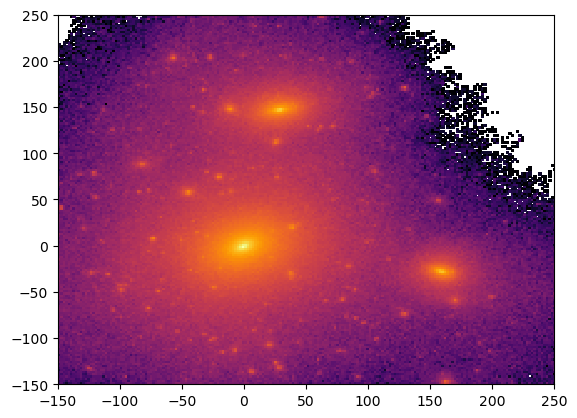

In [4]:
'''
figuring it out
plt.hist2d(np.sqrt(Pos[:,0]**2 + Pos[:,1]**2 + Pos[:,2]**2), Mass )
plt.show()
'''

plt.hist2d(Pos[:,0], Pos[:,1],norm = LogNorm(), bins = 300, cmap = 'inferno')
plt.axis([-150,250,-150,250])
plt.show()

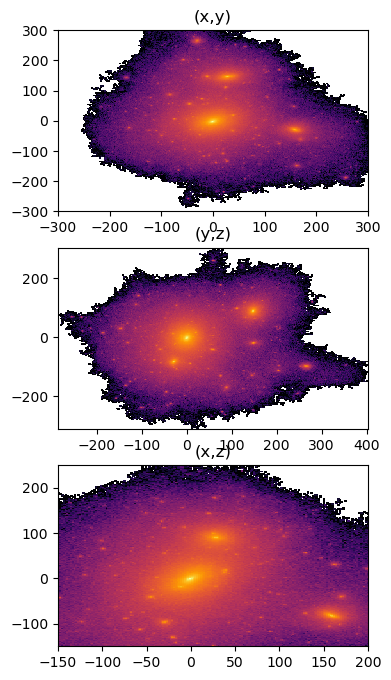

In [5]:
fig, axis = plt.subplots(nrows = 3)
axis[0].hist2d(Pos[:,0], Pos[:,1], norm = LogNorm(), bins = 300, cmap = 'inferno')
axis[0].axis([-300,300,-300,300])
axis[0].set_title("(x,y)")
axis[1].hist2d(Pos[:,1], Pos[:,2], norm = LogNorm(), bins = 300, cmap = 'inferno')
plt.axis([-150,200,-150,250])
axis[1].set_title("(y,z)")
axis[2].hist2d(Pos[:,0], Pos[:,2], norm = LogNorm(), bins = 300, cmap = 'inferno')
plt.axis([-150,200,-150,250])
axis[2].set_title("(x,z)")
fig.set_figwidth(4)
fig.set_figheight(8)
plt.show()

In [6]:
coords = [ [0, 0, 0,],
[28.9307, 147.77176, 91.3073],
[159.32645, -27.599352, -80.43161],
[-29.184427, 266.3879, -95.67256],
[-10.797834, 148.63385, -17.152555],
[-44.74542, 58.259293, -40.10336],
[-82.00299, 89.14701, -168.42316],
[39.252796, 20.820791, 19.300589],
[162.94783, -146.49446, 32.405037],
[170.69516, -58.414986, -39.244144] ]
'''
Unsure how to plot only x,y points only in x,y plot which is a lot of additional work
and not make it easier
'''

xy,yz, xz = [],[],[]

for i in coords:
    xy.append(i[:2])
    yz.append(i[1:])
    xz.append(i[::2])
"""xy = np.array(xy)
yz = np.array(yz)
xz = np.array(xz)"""

'xy = np.array(xy)\nyz = np.array(yz)\nxz = np.array(xz)'

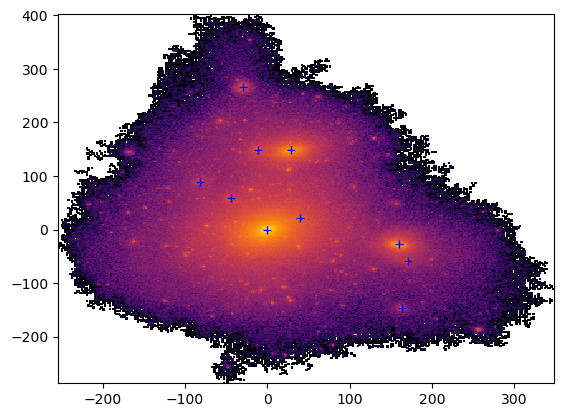

In [7]:
#Plotting points on the projections
#xy
Xx, Yy = [],[]
for i in xy:
    Xx.append(i[0])
    Yy.append(i[1])
Xy,Yz = [], []
for i in yz:
    Xy.append(i[0])
    Yz.append(i[1])

plt.hist2d(Pos[:,0], Pos[:,1], norm = LogNorm(), bins = 300, cmap = 'inferno')
plt.plot(Xx, Yy, "b+")
plt.show()


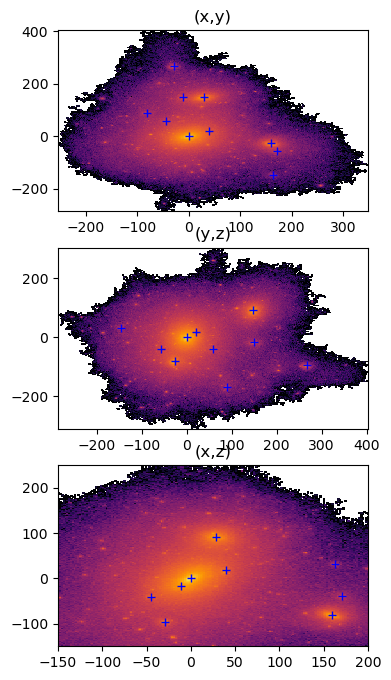

In [8]:
fig, axis = plt.subplots(nrows = 3)
axis[0].hist2d(Pos[:,0], Pos[:,1], norm = LogNorm(), bins = 300, cmap = 'inferno')
axis[0].plot(Xx, Yy, "b+")
plt.axis([-150,200,-150,250])
axis[0].set_title("(x,y)")
axis[1].hist2d(Pos[:,1], Pos[:,2], norm = LogNorm(), bins = 300, cmap = 'inferno')
axis[1].plot(Xy, Yz, "b+")
plt.axis([-150,200,-150,250])
axis[1].set_title("(y,z)")
axis[2].hist2d(Pos[:,0], Pos[:,2], norm = LogNorm(), bins = 300, cmap = 'inferno')
axis[2].plot(Xx, Yz, "b+")
plt.axis([-150,200,-150,250])
axis[2].set_title("(x,z)")
fig.set_figwidth(4)
fig.set_figheight(8)
plt.show()

In [9]:
logR = np.linspace(-1.0,2.5,41)
R = 10.0**logR
R = R * u.kpc
VolumeOfShell = 4.0/3.0 * np.pi * ((R[1:])**3 - (R[:-1])**3)
MidpointShell = 0.5 * (R[1:] + R[:-1])


In [10]:
'''okay now I need to somehow assign the radii values to each of the mass values and then compare it to the i and i+1 shells and then sum up the mass in each shell according to the conditions set'''
radii = np.sqrt(Pos[:, 0]**2 + Pos[:, 1]**2 + Pos[:, 2]**2)
radii = radii * u.kpc
#Sorts the radii values into our bins --> we can see which mass element is in which bin
bins = np.digitize(radii, R)

#Using np.bincount to see how many mass particles are in each bin
count = np.bincount(bins)
count = np.delete(count, 0)
count = np.delete(count, -1)

#Since each mass is the same we just need to multiply the bincount with the mass to see how much mass is in each bin?
Massdistribution = count*Mass[0]
R = 10.0**logR
R = R * u.kpc
R = np.delete(R, -1)

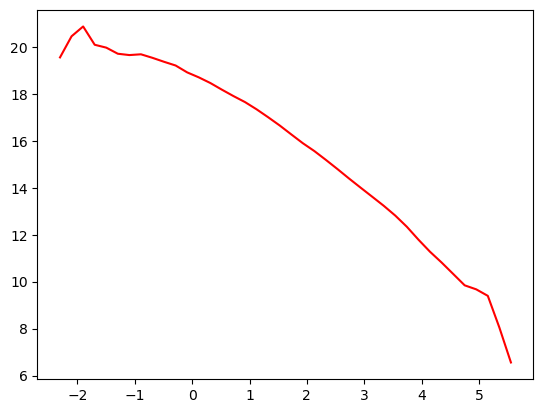

In [11]:
#We know how much mass is in each shell and the volume of each shell so then it's just a matter of 
#the mass in each shell with each volume to find the density? I don't see how that makes it a function of R
rho = Massdistribution/VolumeOfShell
#forgot to declare units of rho, came into trouble while trying to find rcrit
#Leave it, it'll be easier to remove the units from crit_dens
#rho = rho.to(u.M_sun/u.kpc**3)
#Nevermind, the units thing might be messing with everything till now
rho = rho * u.M_sun
#rho = rho * 1/u.kpc

#Now to plot logrho vs log R
#No idea why R is longer and which value I need to delete, just going to delete the last one because it seems like it is going to 0 anyway
#Need to declare R every time before running this cell because of the deletion

plt.plot(np.log(R.value), np.log(rho.value), "r")
#plt.figure(figsize = (25,25))
plt.show()

In [12]:
#Figuring out the astropy component
#Replacing WMAP9 with Planck15
from astropy.cosmology import Planck15 as pl
from astropy import units as u
crit_dens = pl.critical_density(0)
crit_dens = crit_dens.to(u.M_sun/u.kpc**3)
crit_dens 

<Quantity 127.35344307 solMass / kpc3>

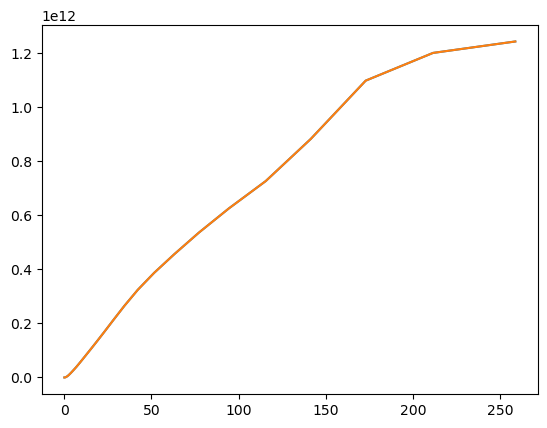

In [22]:
#Figuring out what radius corresponds to which density for crit_dens
'''crit = np.interp(crit_dens, rho, R)
R_crit
One reason for the intercept method to be wrong in this case is because the critical density is 127
which is lower than min value of rho we have, so the intercept function just goes to the min value
of R.
A method that Abhilash suggested is to try to Peel back density layers until we get the required density 
and check the radius of that.
'''



CulMass = np.cumsum(Massdistribution)
plt.plot(R, CulMass)



CulMass = np.cumsum(Massdistribution)
plt.plot(R, CulMass)

MeanEnclosedDensity = CulMass * u.M_sun / ( (4/3) * np.pi * R**3 )


In [14]:
np.sort(rho)

<Quantity [7.04958907e+02, 3.12354142e+03, 1.20405639e+04, 1.58754482e+04,
           1.88383520e+04, 3.06731183e+04, 4.98748490e+04, 7.87930412e+04,
           1.31827876e+05, 2.27995389e+05, 3.66850955e+05, 5.57409272e+05,
           8.21017668e+05, 1.20622445e+06, 1.77993441e+06, 2.66017617e+06,
           3.92942159e+06, 5.72997801e+06, 8.01597557e+06, 1.16651362e+07,
           1.70516352e+07, 2.42314132e+07, 3.39659822e+07, 4.61717114e+07,
           5.96497045e+07, 7.83441190e+07, 1.04035623e+08, 1.32418660e+08,
           1.63508323e+08, 2.19208094e+08, 2.56711673e+08, 3.03794011e+08,
           3.09679353e+08, 3.41948220e+08, 3.53412501e+08, 3.61929091e+08,
           4.69203423e+08, 5.30397599e+08, 7.61420849e+08, 1.15563920e+09] solMass / kpc3>

In [15]:
np.sort(R)


<Quantity [1.00000000e-01, 1.22320712e-01, 1.49623566e-01, 1.83020611e-01,
           2.23872114e-01, 2.73841963e-01, 3.34965439e-01, 4.09732110e-01,
           5.01187234e-01, 6.13055792e-01, 7.49894209e-01, 9.17275935e-01,
           1.12201845e+00, 1.37246096e+00, 1.67880402e+00, 2.05352503e+00,
           2.51188643e+00, 3.07255737e+00, 3.75837404e+00, 4.59726989e+00,
           5.62341325e+00, 6.87859912e+00, 8.41395142e+00, 1.02920053e+01,
           1.25892541e+01, 1.53992653e+01, 1.88364909e+01, 2.30409298e+01,
           2.81838293e+01, 3.44746607e+01, 4.21696503e+01, 5.15822165e+01,
           6.30957344e+01, 7.71791516e+01, 9.44060876e+01, 1.15478198e+02,
           1.41253754e+02, 1.72782598e+02, 2.11348904e+02, 2.58523484e+02] kpc>

In [16]:
#Massdistribution * u.M_sun / ((4/3) * np.pi * R**3)

'''Massineachshell = []
sum = 0
for i in Massdistribution:
    sum+=i
    Massineachshell.append(sum)
    
Massineachshell * u.M_sun / ((4/3) * np.pi * R**3)

Massdistribution * u.M_sun / VolumeOfShell

Massdistribution * u.M_sun / ((4/3) * np.pi * R**3)'''

#Still hasn't worked because still the smallest density here is 585 m_sun/kpc**3 which is
#still more than the critical density so we can't use it to caluclate R and then M_tot



<Quantity [2.57097690e+08, 6.32136238e+08, 9.59418717e+08, 4.40339326e+08,
           3.89535547e+08, 3.00475742e+08, 2.83887500e+08, 2.93405216e+08,
           2.52211643e+08, 2.13123599e+08, 1.81987898e+08, 1.35745608e+08,
           1.09934780e+08, 8.63710097e+07, 6.50417660e+07, 4.95215490e+07,
           3.83320367e+07, 2.81987659e+07, 2.01170672e+07, 1.41563717e+07,
           9.68446727e+06, 6.65491187e+06, 4.75706274e+06, 3.26222980e+06,
           2.20849450e+06, 1.47771241e+06, 1.00141490e+06, 6.81613882e+05,
           4.62764581e+05, 3.04561903e+05, 1.89283164e+05, 1.09444308e+05,
           6.54144639e+04, 4.14064042e+04, 2.54650101e+04, 1.56397148e+04,
           1.31798940e+04, 9.99614968e+03, 2.59318316e+03, 5.85261189e+02] solMass / kpc3>

<IPython.core.display.Javascript object>


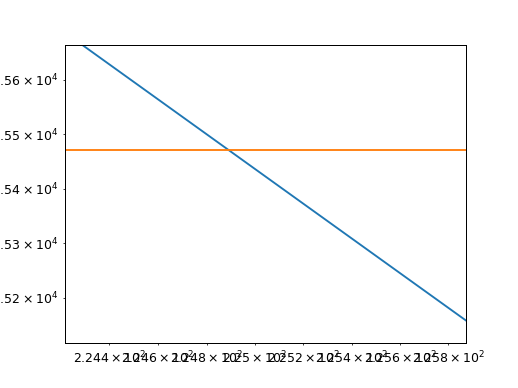

[]

In [82]:
'''#Trying to solve ask 7 and 8
#200 * crit_dens = M_tot / (4/3 * np.pi * R**3)
#Placeholder value for M_tot
M_tot = 0
R_M_tot = np.cbrt(M_tot /(200 * crit_dens * 4/3 * np.pi))
                    
#M200 and R 200
                  
R200 = np.interp(200*crit_dens, rho, R)
R200'''

%matplotlib notebook
MeanEnclosedDensity = CulMass * u.M_sun / ( (4/3) * np.pi * R**3 )

'''R200 = np.interp(np.log(200*crit_dens.value), np.log(MeanEnclosedDensity.value), np.log(R.value))


        
slope, intercept = np.polyfit(np.log(MeanEnclosedDensity[10:].value), np.log(R[10:].value), 1)

slope = np.exp(slope)
intercept = np.exp(intercept)
print(slope, intercept)

plt.plot(R.value,MeanEnclosedDensity.value)
plt.plot(np.linspace(-1, 500, 1000), np.linspace(10, 20, 1000)*slope + intercept, 'r')
plt.plot([0.1,500],[200*crit_dens.value,200*crit_dens.value])

plt.loglog()'''



plt.plot(R,MeanEnclosedDensity)
plt.plot([0.1,500],[200*crit_dens.value,200*crit_dens.value])
plt.loglog()


In [83]:
200*crit_dens

<Quantity 25470.68861443 solMass / kpc3>

In [27]:
R

<Quantity [1.00000000e-01, 1.22320712e-01, 1.49623566e-01, 1.83020611e-01,
           2.23872114e-01, 2.73841963e-01, 3.34965439e-01, 4.09732110e-01,
           5.01187234e-01, 6.13055792e-01, 7.49894209e-01, 9.17275935e-01,
           1.12201845e+00, 1.37246096e+00, 1.67880402e+00, 2.05352503e+00,
           2.51188643e+00, 3.07255737e+00, 3.75837404e+00, 4.59726989e+00,
           5.62341325e+00, 6.87859912e+00, 8.41395142e+00, 1.02920053e+01,
           1.25892541e+01, 1.53992653e+01, 1.88364909e+01, 2.30409298e+01,
           2.81838293e+01, 3.44746607e+01, 4.21696503e+01, 5.15822165e+01,
           6.30957344e+01, 7.71791516e+01, 9.44060876e+01, 1.15478198e+02,
           1.41253754e+02, 1.72782598e+02, 2.11348904e+02, 2.58523484e+02] kpc>